## Introduction

This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”.

**Data Source:** https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews/data

* This dataset includes **23,486 rows** and **10 feature variables**. Each row corresponds to a customer review, and includes the variables:

`Clothing ID:` Integer Categorical variable that refers to the specific piece being reviewed.

`Age`: Positive Integer variable of the reviewers age.

`Title`: String variable for the title of the review.

`Review Text`: String variable for the review body.

`Rating`: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

`Recommended IND`: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

`Positive Feedback Count`: Positive Integer documenting the number of other customers who found this review positive.

`Division Name`: Categorical name of the product high level division.

`Department Name`: Categorical name of the product department name.

`Class Name`: Categorical name of the product class name.

## Understanding & Cleaning the data

In [7]:
# importing all essential libraries
import numpy as np 
import pandas as pd
import urllib.request as ureq
import os

In [8]:
# importing plotly library
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [9]:
# change working directory to the file containing the data
os.chdir('D:\\Courses\\Power BI\\Sentiment Analysis')
%pwd

'D:\\Courses\\Power BI\\Sentiment Analysis'

In [10]:
# list of files present in the working directory
os.listdir()

['Womens Clothing Reviews.csv',
 'Womens sentiment analysis.pbix',
 'womens_apparel_sentiment_analysis_refined.xlsx']

In [11]:
# import data from excel file to pandas data frame
main_df=pd.read_csv('Womens Clothing Reviews.csv')

In [12]:
# summarizes the information in the data frame
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


As per the the above output, we can see that there exists columns with `NaN` values.

* Not all reviews have `Title` & `Review Text`.
* `NaN` values in the columns `Division Name`, `Department Name`, `Class Name` need to be handled separately

In [14]:
# understand the numberical data provided in the columns
main_df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [15]:
# understand the main dataframe
main_df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [16]:
#column names in the datafra,e
main_df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

The first column in the dataframe is missing the header. Hence this needs to be rectified

In [18]:
# replacing the name of the unnamed column
main_df.rename(columns={'Unnamed: 0': 'Sr No'}, inplace=True)
main_df

,Sr No,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [19]:
# find out categorical variables in the dataframe
main_df.nunique()

Sr No                      23486
Clothing ID                 1206
Age                           77
Title                      13993
Review Text                22634
Rating                         5
Recommended IND                2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64

In [20]:
print("Division Name: ",main_df["Division Name"].unique())
print("Department Name: ",main_df["Department Name"].unique())
print("Class Name : ",main_df["Class Name"].unique())
print("Rating: ",main_df["Rating"].unique())

Division Name:  ['Initmates' 'General' 'General Petite' nan]
Department Name:  ['Intimate' 'Dresses' 'Bottoms' 'Tops' 'Jackets' 'Trend' nan]
Class Name :  ['Intimates' 'Dresses' 'Pants' 'Blouses' 'Knits' 'Outerwear' 'Lounge'
 'Sweaters' 'Skirts' 'Fine gauge' 'Sleep' 'Jackets' 'Swim' 'Trend' 'Jeans'
 'Legwear' 'Shorts' 'Layering' 'Casual bottoms' nan 'Chemises']
Rating:  [4 5 3 2 1]


Let us now see which how each Division is subdivided into Departments. And further how each department has multiple classes.
This can be visualised using the `groupby()` function

In [22]:
department_df=main_df.groupby(["Division Name","Department Name","Class Name"])["Class Name"].count().reset_index(name="Class Count")

In [23]:
department_df

,Division Name,Department Name,Class Name,Class Count
0,General,Bottoms,Casual bottoms,2
1,General,Bottoms,Jeans,787
2,General,Bottoms,Pants,835
3,General,Bottoms,Shorts,317
4,General,Bottoms,Skirts,601
5,General,Dresses,Dresses,3730
6,General,Jackets,Jackets,397
7,General,Jackets,Outerwear,248
8,General,Tops,Blouses,1993
9,General,Tops,Fine gauge,685


There is a typo under `Division Name`. Category *'Intimates'* has been wrongly marked as *'Initmates'*

In [25]:
main_df["Division Name"]= main_df["Division Name"].replace('Initmates','Intimates')

Lets look at some sample reviews of `Class Name` _Legwear_ below.

In [27]:
main_df[main_df["Class Name"]=="Legwear"]["Review Text"]

622      I have bought other leggings at retailer and t...
623      Love love love these leggings and what an amaz...
665      Received many compliments the first day i wore...
679      I ordered these in a size small on sale, think...
685      These are the perfect leggings. they're so sof...
                               ...                        
22170    I bought the black and gray fleece lined leggi...
22216    These are the best tights! last year i bought ...
22912    Fun socks you will want to show off. design is...
23239    I just go these socks in one of my beauty boxe...
23438    I feel like snagging a pair of these was the e...
Name: Review Text, Length: 165, dtype: object

Based on the reviews it is pretty much possible to assign categories to the unclassified products. This will help us handle the `NaN` values ahead.

Let us have a look at the data in which `Division Name` column contains NaN values

In [30]:
main_df[main_df["Division Name"].isna()]

,Sr No,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
9444,9444,72,25,My favorite socks!!!,"I never write reviews, but these socks are so ...",5,1,0,NaN,NaN,NaN
13767,13767,492,23,So soft!,I just love this hoodie! it is so soft and com...,5,1,1,NaN,NaN,NaN
13768,13768,492,49,Wardrobe staple,Love this hoodie. so soft and goes with everyt...,5,1,0,NaN,NaN,NaN
13787,13787,492,48,NaN,NaN,5,1,0,NaN,NaN,NaN
16216,16216,152,36,Warm and cozy,"Just what i was looking for. soft, cozy and warm.",5,1,0,NaN,NaN,NaN
16221,16221,152,37,Love!,I am loving these. they are quite long but are...,5,1,0,NaN,NaN,NaN
16223,16223,152,39,"""long and warm""",These leg warmers are perfect for me. they are...,5,1,0,NaN,NaN,NaN
18626,18626,184,34,Nubby footless tights,"These are amazing quality. i agree, size up to...",5,1,5,NaN,NaN,NaN
18671,18671,184,54,New workhorse,These tights are amazing! if i care for them w...,5,1,0,NaN,NaN,NaN
20088,20088,772,50,Comfy sweatshirt!,This sweatshirt is really nice! it's oversize...,5,1,0,NaN,NaN,NaN


In [31]:
main_df[main_df["Division Name"].isna()].index

Index([ 9444, 13767, 13768, 13787, 16216, 16221, 16223, 18626, 18671, 20088,
       21532, 22997, 23006, 23011],
      dtype='int64')

Here we particularly target **`row index`** 9444 to understand the nature of the product based on the review given

In [33]:
main_df.loc[9444]["Review Text"]

"I never write reviews, but these socks are so worth it! they are incredibly soft, stretchy, and hug your feet just tight enough where you don't even realize you're wearing socks, but they aren't too tight.\n\ni wash them straight away after wearing so i can wear them again. you won't regret it. true to color!"

* Index No `9444` can be added to General/Tops/Knits. Hence the missing values can be filled into appropriate categories

In [35]:
#use fillna() & loc method to handle missing values
main_df.loc[9444, ["Division Name", "Department Name", "Class Name"]] = main_df.loc[9444, ["Division Name", "Department Name", "Class Name"]].fillna({"Division Name": "Intimates", "Department Name": "Intimate", "Class Name": "Legwear"})


In [36]:
main_df.loc[9444]

Sr No                                                                   9444
Clothing ID                                                               72
Age                                                                       25
Title                                                   My favorite socks!!!
Review Text                I never write reviews, but these socks are so ...
Rating                                                                     5
Recommended IND                                                            1
Positive Feedback Count                                                    0
Division Name                                                      Intimates
Department Name                                                     Intimate
Class Name                                                           Legwear
Name: 9444, dtype: object

As seen above, now the missing values are filled.

However as more efficient way of handling the missing values would be based on `Clothing ID`

The `Clothing ID` values to be handles are as follows: 
* 492
* 152
* 184
* 772
* 665
* 136

In [38]:
main_df[main_df["Clothing ID"]==492]

,Sr No,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
13767,13767,492,23,So soft!,I just love this hoodie! it is so soft and com...,5,1,1,NaN,NaN,NaN
13768,13768,492,49,Wardrobe staple,Love this hoodie. so soft and goes with everyt...,5,1,0,NaN,NaN,NaN
13787,13787,492,48,NaN,NaN,5,1,0,NaN,NaN,NaN


In [39]:
main_df[main_df["Class Name"]=="Knits"]["Review Text"]

6        I aded this in my basket at hte last mintue to...
7        I ordered this in carbon for store pick up, an...
39       Great casual top with flare. looks cute with g...
40       Pretty and unique. great with jeans or i have ...
41       This is a beautiful top. it's unique and not s...
                               ...                        
23446    This tee is amazing. it's light weight and per...
23458    This is my new favorite sweater. it is lightwe...
23472    I saw the shirt on the retailer website and ne...
23480                                                  NaN
23482    It reminds me of maternity clothes. soft, stre...
Name: Review Text, Length: 4843, dtype: object

* Clothing ID `492` can be added to General/Tops/Knits

In [41]:
main_df[main_df["Clothing ID"]==152]

,Sr No,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
16216,16216,152,36,Warm and cozy,"Just what i was looking for. soft, cozy and warm.",5,1,0,NaN,NaN,NaN
16221,16221,152,37,Love!,I am loving these. they are quite long but are...,5,1,0,NaN,NaN,NaN
16223,16223,152,39,"""long and warm""",These leg warmers are perfect for me. they are...,5,1,0,NaN,NaN,NaN


In [42]:
print(main_df[main_df["Clothing ID"]==152].iloc[0]["Review Text"])
print(main_df[main_df["Clothing ID"]==152].iloc[1]["Review Text"])
print(main_df[main_df["Clothing ID"]==152].iloc[2]["Review Text"])

Just what i was looking for. soft, cozy and warm.
I am loving these. they are quite long but are prefect to wear with pj shorts or leggings. very soft and cozy.
These leg warmers are perfect for me. they are long enough and thick and warm enough to keep me from freezing in cold weather. great for people with large calves.


* Clothing ID `152` can be added to Intimates/Intimates/Legwear

In [44]:
main_df[main_df["Clothing ID"]==184]

,Sr No,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
18626,18626,184,34,Nubby footless tights,"These are amazing quality. i agree, size up to...",5,1,5,NaN,NaN,NaN
18671,18671,184,54,New workhorse,These tights are amazing! if i care for them w...,5,1,0,NaN,NaN,NaN


In [45]:
print(main_df[main_df["Clothing ID"]==184].iloc[0]["Review Text"])
print(main_df[main_df["Clothing ID"]==184].iloc[1]["Review Text"])

These are amazing quality. i agree, size up to not have such a sheer effect. i would not wear them as just leggings without a long shirt covering the butt.

they are warm. i wore them under some ski stuff. kept me warm.

i also washed them on handwash cycle. seemed to be ok.
These tights are amazing! if i care for them well, i know they will last me seasons upon seasons.


In [46]:
df1=main_df[main_df["Department Name"]=="Intimate"]
print(df1[df1["Class Name"]=="Legwear"].iloc[0]["Review Text"])
print(df1[df1["Class Name"]=="Legwear"].iloc[10]["Review Text"])
print(df1[df1["Class Name"]=="Legwear"].iloc[30]["Review Text"])

I have bought other leggings at retailer and they were fine. these run small. i have to return.
I've been looking at these for some time and i finally pulled the trigger. i'm glad i did because these tights are such a fun accessory to add to my wardrobe. they add just enough whimsy to classic dresses and skirts. these are not your everyday thin stretchy tights. they remind me of the tights i would wear in the winter as a little girl; they are really sweater tights. i think this aspect is great, but they do not have as much give as other tights. i am petite, about 5'3" 112 lbs and the small
I have the blue and gray and love the look and feel. however, the gray within days ripped at the seam and other areas.


* Clothing ID `184` can be added to Intimates/Intimates/Legwear

In [48]:
main_df[main_df["Clothing ID"]==772]

,Sr No,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
20088,20088,772,50,Comfy sweatshirt!,This sweatshirt is really nice! it's oversize...,5,1,0,NaN,NaN,NaN


In [49]:
main_df[main_df["Clothing ID"]==772].iloc[0]["Review Text"]

"This sweatshirt is really nice!  it's oversized so best worn with leggings or skinny jeans. it's very warm, without being too thick. it looks almost exactly like the picture.   the quality seems pretty good, but we'll see how it holds up after it's washed."

In [50]:
df1=main_df[main_df["Department Name"]=="Tops"]
print(df1[df1["Class Name"]=="Sweaters"].iloc[5]["Review Text"])

Bought this on a whim and it exceeded my expectations. i didn't know what to expect with the quality of the fabric but this is incredibly soft and warm. haven't worn it outside yet but i can see this already as one of my favorite items. i'm usually an extra-small but the xxs also fits. it's a great buy especially since it's on sale now.


* Clothing ID `772` can be added to General/Tops/Sweaters

In [52]:
main_df[main_df["Clothing ID"]==665]

,Sr No,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
21532,21532,665,43,So worth it!,Got these on sale...absolutely love eberjey! f...,5,1,0,NaN,NaN,NaN


In [53]:
main_df[main_df["Clothing ID"]==665].iloc[0]["Review Text"]

'Got these on sale...absolutely love eberjey! fabric is super soft and easy to wash. more "normal" than other eberjey styles (not lingerie). i\'m 5\'6", 125 lbs and small fit well. i am small busted and there is definitely extra room but doesn\'t make it fit weird at all. highly recommend!'

In [54]:
df1=main_df[main_df["Department Name"]=="Intimate"]
print(df1[df1["Class Name"]=="Sleep"].iloc[3]["Review Text"])

I purchased these for something other than sweats to wear for a girls get away weekend. they were so comfortable and flattering, friends told me i could wear them out for dinner.

the fabric is beautiful, and i loved the way they draped. the angled cut on the legs is very cute, and something a bit different. these could be perfect for a hot summer evening dinner, because the fabric is very light and breezy. dress it up with a tank top and ballet flats and you're good to go.


* Clothing ID `665` can be added to Intimates/Intimate/Sleep


In [56]:
main_df[main_df["Clothing ID"]==136]

,Sr No,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
22997,22997,136,47,"Charcoal, pale gray, a bit of silver!","These socks are soft and comfortable, and they...",5,1,1,NaN,NaN,NaN
23006,23006,136,33,Cute itsy socks,"Love polkadots, love sparkle. these little soc...",5,1,0,NaN,NaN,NaN
23011,23011,136,36,Super socks,I love these little socks ? and the dots spark...,5,1,0,NaN,NaN,NaN


* Clothing ID `136` can be added to Intimates/Intimate/Legwear

In [58]:
# create list for Clothing ID mapped against division name
div_name={492:"General",
         152:"Intimates",
         184:"Intimates",
         772:"General",
         665:"Intimates",
         136:"Intimates"}

# create list for Clothing ID mapped against department name
dep_name={492:"Tops",
         152:"Intimate",
         184:"Intimate",
         772:"Tops",
         665:"Intimate",
         136:"Intimate"}

# create list for Clothing ID mapped against class name
cls_name={492: "Knits",
         152:"Legwear",
         184:"Legwear",
         772:"Sweaters",
         665:"Sleep",
         136:"Legwear"}

In [59]:
div_name.items()

dict_items([(492, 'General'), (152, 'Intimates'), (184, 'Intimates'), (772, 'General'), (665, 'Intimates'), (136, 'Intimates')])

In [60]:
# Adding division name
for clothing_id, category in div_name.items():
    main_df.loc[main_df['Clothing ID'] == clothing_id, 'Division Name'] = category

# Adding dept name
for clothing_id, category in dep_name.items():
    main_df.loc[main_df['Clothing ID'] == clothing_id, 'Department Name'] = category

# Adding class name
for clothing_id, category in cls_name.items():
    main_df.loc[main_df['Clothing ID'] == clothing_id, 'Class Name'] = category


In [61]:
main_df[main_df["Clothing ID"]==184]

,Sr No,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
18626,18626,184,34,Nubby footless tights,"These are amazing quality. i agree, size up to...",5,1,5,Intimates,Intimate,Legwear
18671,18671,184,54,New workhorse,These tights are amazing! if i care for them w...,5,1,0,Intimates,Intimate,Legwear


In [62]:
main_df[main_df["Division Name"].isna()]

,Sr No,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name


In [63]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Sr No                    23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23486 non-null  object
 9   Department Name          23486 non-null  object
 10  Class Name               23486 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


Now all `NaN` vaues in  `Division Name`,`Department Name`,`Class Name` are taken care of.

To take care of the `NaN` values in the columns titled `Title` & `Review Texts`, we will create dummy reviews based on the ratings provided by the customers

In [66]:
# create list for product rating mapped against Title
rev_title={1:"Poor Product",
         2:"Below Average Product",
         3:"Not Bad Product",
         4:"Good Product",
         5:"Excellent Product"}

# Adding review name
# Fill empty Title values based on ratings
for rating, review in rev_title.items():
    main_df.loc[main_df['Title'].isna() & (main_df['Rating'] ==rating), 'Title'] = review


# Fill empty Title values based on ratings
for rating, review in rev_title.items():
    main_df.loc[main_df['Review Text'].isna() & (main_df['Rating'] ==rating), 'Review Text'] = review

In [67]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Sr No                    23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    23486 non-null  object
 4   Review Text              23486 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23486 non-null  object
 9   Department Name          23486 non-null  object
 10  Class Name               23486 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [68]:
main_df.sample(5)

,Sr No,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
1653,1653,835,46,Cute blouse!,"Very pretty blouse. it does run quite large, i...",4,1,7,General Petite,Tops,Blouses
10123,10123,839,35,Western shirt with a feminine flare,This shirt is actually not as fitted as it loo...,4,1,1,General Petite,Tops,Blouses
9128,9128,622,38,Cute summer top,Love this top! it's very simple modern design ...,5,1,0,Intimates,Intimate,Lounge
22088,22088,582,43,Romper rules,Overall great romper! i have a long torso and ...,4,1,0,General,Bottoms,Shorts
2655,2655,282,45,Love these!,I love these shorts! i know reviews say to siz...,5,1,3,General,Bottoms,Shorts


No `Nan` values are left and further data insights can now be drawn from the `main_df`

In [70]:
plus_90_df=main_df[main_df.Age>=90]
plus_90_df

,Sr No,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
659,659,252,93,Amazing suit!,"This is by far the cutest, most glamorous one ...",5,1,3,Intimates,Intimate,Swim
5901,5901,1094,90,Gorgeous,Absolutely beautiful dress. i'm 5'11 and this ...,5,1,0,General Petite,Dresses,Dresses
6543,6543,1095,94,Good Product,Flattering! i love how it looks like a maxi dr...,4,1,0,General,Dresses,Dresses
8327,8327,1078,99,Beachy and boho!,I love the weight of the material; sometimes c...,5,1,1,General,Dresses,Dresses
9513,9513,871,91,Excellent Product,"From the website picture (in particular, the g...",5,1,15,General,Tops,Knits
10617,10617,1028,91,Pajama jeans,"I love the coh fleetwood jeans, and since i wa...",2,0,3,General,Bottoms,Jeans
10686,10686,1002,91,Excellent Product,Excellent Product,5,1,0,General,Bottoms,Skirts
11545,11545,949,99,Good Product,"Great quality, i didn't expect the neck to be ...",4,1,4,General,Tops,Sweaters
12631,12631,1081,90,Disappointed,I was really looking forward to this dress. i ...,2,0,15,General,Dresses,Dresses
14997,14997,1025,92,The only jeans you'll ever wear!,It's hard to tell how jeans will fit when shop...,5,1,2,General,Bottoms,Jeans


It seems very absurd to see women above the age of 90 actively using the platform for reviews. Let's have a closer look at the reviews and try to see if we get any clues about the ages of these customers.

In [72]:
plus_90_df=main_df[main_df.Age>=90]

for i in plus_90_df.index:
    print(main_df.iloc[i]["Review Text"],"\n")

This is by far the cutest, most glamorous one piece i have ever tried on! it fits perfectly and is flattering in the right places, it doesn't show too much cleavage and is modest enough for family events. absolutely love this suit in navy. wasn't in love with the rest of the patterns, hoping they come out in more solid colors someday soon! 

Absolutely beautiful dress. i'm 5'11 and this dress works for tall girls:)) 

Flattering! i love how it looks like a maxi dress.  fits me perfectly! 

I love the weight of the material; sometimes crinkled gauze looks cheap; this does not. the lace trim is more 2-tone than the photo suggests, but that is not negative, and the color of the dress is more salmon than peach, again, not a negative. the length is as it is on the model, just below the knee. i wore it to what turned out to be surprise party for me at the beach! i paired it with huge silver hoops and silver flipflops. i felt special, stylish and comfortable. it was a good dress for some 

Fr

In [73]:
main_df=main_df[main_df.Age<90]

We shall add another column in the dataframe to classify these customers into 3 different categories based on their ages:
* **Between 18-25**: Hummingbirds
* **Between 26-45**: Bumblebees
* **Between 46-60**: Doves
* **Above 60**: Owls

In [75]:
#categorization of ages as per above rules
def classify_age(age):
    if age <=25 :
        return 'Hummingbirds'
    elif 26 <= age <= 45:
        return 'Bumblebees'
    elif 46 <= age <= 60:
        return 'Doves'    
    else:
        return 'Owls'

# Assuming your age column is named 'Age'
main_df['Age Group'] = main_df['Age'].apply(classify_age)
main_df.head()

C:\Users\Tarun Raikar\AppData\Local\Temp\ipykernel_14424\1703802929.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['Age Group'] = main_df['Age'].apply(classify_age)


,Sr No,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Age Group
0,0,767,33,Good Product,Absolutely wonderful - silky and sexy and comf...,4,1,0,Intimates,Intimate,Intimates,Bumblebees
1,1,1080,34,Excellent Product,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Bumblebees
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Doves
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,Doves
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Doves


In [76]:
main_df.to_excel("womens_apparel_sentiment_analysis_refined.xlsx", index=False)

## Data Visualization

In [78]:
main_df.head()

,Sr No,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Age Group
0,0,767,33,Good Product,Absolutely wonderful - silky and sexy and comf...,4,1,0,Intimates,Intimate,Intimates,Bumblebees
1,1,1080,34,Excellent Product,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Bumblebees
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Doves
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,Doves
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Doves


### Q1. Which division is the most reviewed among the three? Explore the reasons for this distribution.

In [80]:
divisional_df=main_df.groupby('Division Name')['Sr No'].count().reset_index(name="Review Count")
divisional_df

,Division Name,Review Count
0,General,13842
1,General Petite,8118
2,Intimates,1511


In [81]:
# importing data visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
# Configuring styles for all plots
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (5, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
matplotlib.rcParams['axes.edgecolor'] = 'black'

In [83]:
# define division wise color palette
div_col={
    'General': '#63C5DA',
    'General Petite': '#E39FF6',
    'Intimates': '#FC6C85'
}

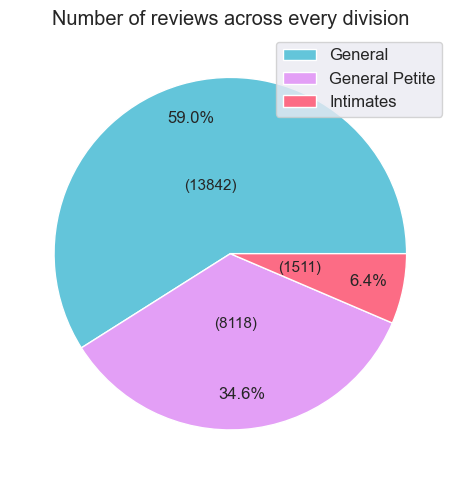

In [84]:
# selecting colors as per the region
divcolors=[div_col[x] for x in divisional_df['Division Name']]

patches, texts, autotexts = plt.pie(divisional_df['Review Count'],
        labels=None,                
        colors=divcolors,
       autopct='%.1f%%',
        pctdistance=0.8,
        labeldistance=0)

# Add tooltips
for i, patch in enumerate(patches):
    ang = (patch.theta1 + patch.theta2) / 2.
    x = patch.r * 0.4* np.cos(np.deg2rad(ang))
    y = patch.r * 0.4* np.sin(np.deg2rad(ang))
    val='(' + str(divisional_df['Review Count'][i]) + ')'
    plt.text(x, y,val , ha='center', va='center', fontsize=11)


plt.title('Number of reviews across every division')
plt.legend(patches, divisional_df['Division Name']) 
plt.tight_layout()
plt.show()

It is observed that the majority of the reviews (>60%) originate from the General division of the apparel company, whereas the Intimates division contributes to less than 7% of the total reviews received.

Several factors may contribute to the disproportionately low number of reviews from the Intimates division:

1. **Lower Market Share**: The Intimates division may hold a relatively smaller portion of the overall apparel market, leading to fewer customers and subsequently fewer reviews.

2. **Limited Product Range**: A narrower assortment or fewer SKUs within the Intimates category could result in fewer purchase opportunities and less customer feedback.

3. **Low Brand Visibility**: The division might have weaker brand recognition or insufficient marketing efforts compared to the General division, limiting its reach and influence.

4. **Low Penetration in Target Audience**: Products may not be effectively reaching or resonating with the intended consumer segments due to inadequate distribution or mismatched product positioning.

5. **Lack of Engagement with the Review Program**: Customers in this category may not be sufficiently aware of or motivated to participate in the review program, possibly due to less emphasis on post-purchase engagement.

6. **Product Sensitivity**: Consumers might be less inclined to publicly review intimate apparel due to privacy concerns or the personal nature of the product.

7. **Comparatively Lower Product Satisfaction**: If the quality, fit, or comfort of the Intimates products is perceived to be superior to competitors, this could suppress positive reviews or lead to review avoidance.

8. **Retail Channel Differences**: If the Intimates division relies more on offline retail or third-party sellers with limited integration into the company’s review ecosystem, this could reduce review capture.

We will explore these potential causes further in the notebook to identify the key drivers behind the low review volume from the Intimates division.

In [86]:
division_sku=main_df.groupby("Division Name")["Clothing ID"].nunique().reset_index(name="SKU count")
division_sku

,Division Name,SKU count
0,General,456
1,General Petite,308
2,Intimates,638


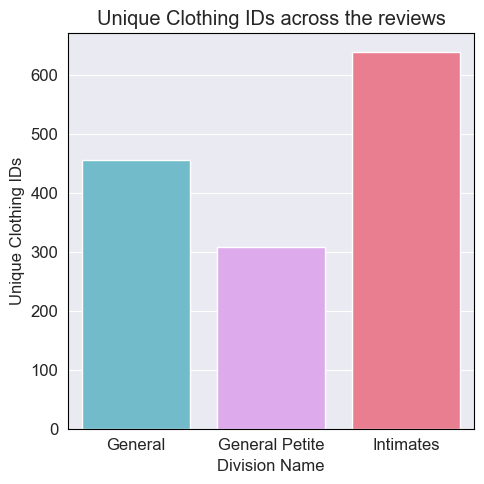

In [87]:
#plot a barchart to understand unique clothing IDs available in review section


#plot barplot
sns.barplot(data=division_sku,
           x="Division Name", y= "SKU count",
           hue="Division Name",palette=div_col)

plt.title('Unique Clothing IDs across the reviews')
plt.xlabel("Division Name")
plt.ylabel("Unique Clothing IDs")


plt.tight_layout()
plt.show()

This is quite contradictory! Intimates have a high number of unique `Clothing ID`s yet this remains to be the least reviewed category. This can be an interesting case to evaluate

### Q2. Which age groups provide the most reviews?

In [90]:
print("Minimum Age reviewd:", min(main_df.Age))
print("Maximum Age reviewd:", max(main_df.Age))

Minimum Age reviewd: 18
Maximum Age reviewd: 89


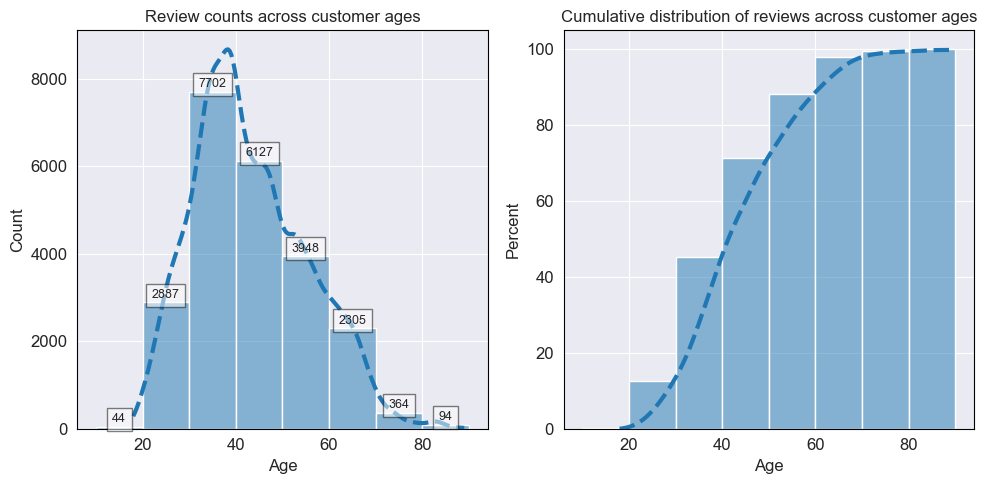

In [91]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
#histogram-1 showing review counts
sns.histplot(main_df.Age, 
             bins=np.linspace(10,90,9),
            kde=True,  line_kws={'color': 'orange', 'linewidth': 3, 'linestyle': '--'},
            ax=ax[0])

#set datalabels for histogram-1
for p in ax[0].patches:
    height = p.get_height()
    ax[0].text(x=p.get_x() + p.get_width() / 2, 
            y=height + 100,                  
            s='{}'.format(int(height)),     
            ha='center',
            fontsize=9,
            bbox=dict(facecolor='white', edgecolor='black',alpha=0.5))                     

#set title for histogram-1
ax[0].set_title("Review counts across customer ages",fontsize=12)

#histogram-2 showing review percentage
sns.histplot(main_df.Age, 
             bins=np.linspace(10,90,9),
            kde=True, line_kws={'color': 'orange', 'linewidth': 3, 'linestyle': '--'},
            cumulative=True,
            stat="percent",
            ax=ax[1])

#set title for histogram-1
ax[1].set_title("Cumulative distribution of reviews across customer ages",fontsize=12)

plt.tight_layout()
plt.show()

In [92]:
# define age group wise color palette
age_col={
    'Hummingbirds': '#abbcea',
    'Bumblebees': '#92b4e3',
    'Doves': '#628dd6',
    'Owls':'#4c74c9'

}

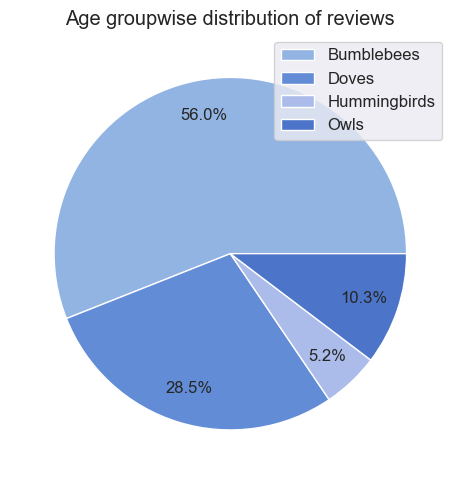

In [93]:
# groupby age group and count the total number of clothing IDs
age_group=main_df.groupby("Age Group")["Clothing ID"].count()


# selecting colors as per the age group
agecolors=[age_col[x] for x in age_group.index]
        
#plot barplot
patches, texts, autotexts = plt.pie(age_group,
                            autopct='%.1f%%',
                            pctdistance=0.8,
                            colors=agecolors)

plt.title('Age groupwise distribution of reviews')

plt.legend(patches, age_group.index) 
plt.tight_layout()
plt.show()

In [94]:
age_group

Age Group
Bumblebees      13144
Doves            6682
Hummingbirds     1223
Owls             2422
Name: Clothing ID, dtype: int64

**Bumblebees** make up for most of the reviewes!

By analyzing and understanding age-based customer demographics, businesses can make data-driven decisions to improve targeting, product design, marketing strategies, and customer engagement. It turns raw data into actionable intelligence for strategic growth.

* **Targeted Marketing**: Align messaging and channels with age-specific preferences (e.g., TikTok for Gen Z, email for older groups).

* **Product Fit**: Design products that suit the needs and tastes of each age group (e.g., trendiness for youth, comfort for older customers).

* **Customer Lifetime Value**: Identify which age segments offer higher long-term value or spending potential.

* **Regional Focus**: Tailor strategies based on the age demographics of different regions.

* **Review Participation**: Understand which age groups are less likely to leave reviews and tailor engagement efforts.


As can be seen from the plots, women between the age ranges of 30-40 provide most reviews. We can say that middle aged women are the target audience for this brand. However there is a scope for getting more participation in the age range of 18-25 through strategic intervention.

More than 85% of the consumers are women aged less than 60 years.

### Q3. How are reviews distributed for each division?

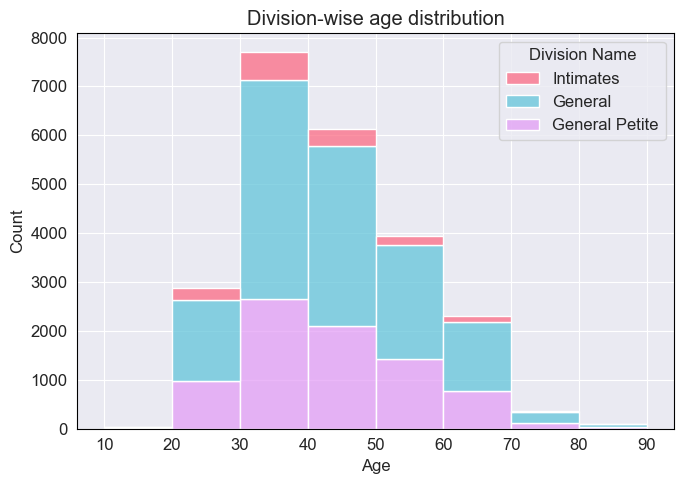

In [99]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1)

sns.histplot(data=main_df, ax=ax, stat="count", multiple="stack",
             x="Age",
             bins=np.linspace(10,90,9),
             palette=div_col, hue="Division Name",
             element="bars", legend=True)
ax.set_title("Division-wise age distribution")
ax.set_xlabel("Age")
ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

In [100]:
#creating a separate dataframe for each category
hb_df=main_df[main_df['Age Group']=="Hummingbirds"]
bb_df=main_df[main_df['Age Group']=="Bumblebees"]
dv_df=main_df[main_df['Age Group']=="Doves"]
ow_df=main_df[main_df['Age Group']=="Owls"]

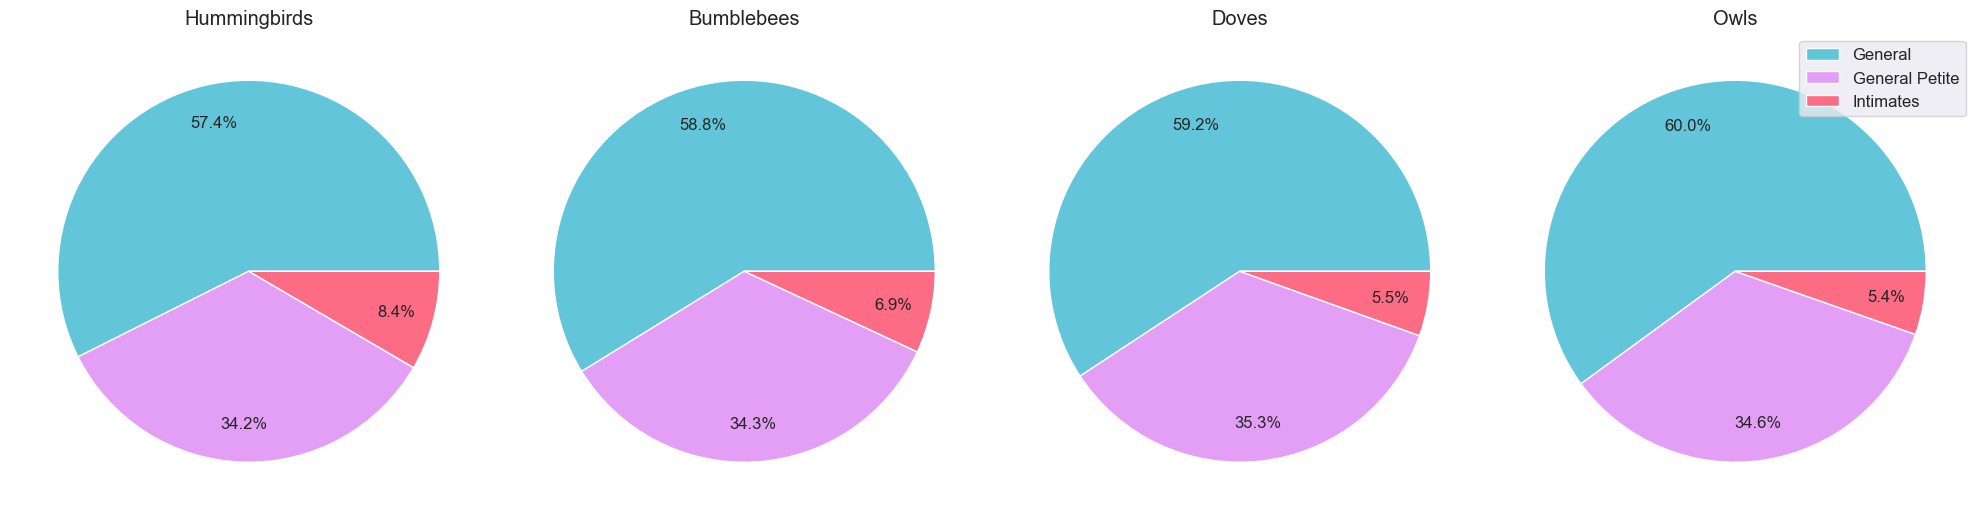

In [101]:
fig,ax=plt.subplots(1,4, figsize=(20,15))

dfs= [hb_df,bb_df,dv_df,ow_df]
titles=["Hummingbirds","Bumblebees","Doves","Owls"]

for ax,df,title in zip(ax.flat, dfs,titles):
    grp=df.groupby("Division Name")["Clothing ID"].count()
    ax.pie(grp,
        labels=None,                
        colors=divcolors,
       autopct='%.1f%%',
        pctdistance=0.8,
        labeldistance=0)
    ax.set_title("{}".format(title))

plt.legend(grp.index)
plt.tight_layout()
plt.show()

It can be hence concluded that all the age categories have the similar distribution across different divisions

Reviews on initimates are marginal as compared to other to segment across all age groups. Reviews on intimates are significantly less for women of 60+ years. Across all age ranges, General Division proves to be themost reviewed category.

### Q4. Which are is most rated itmes?

In [105]:
main_df['Clothing ID'].nunique()

1206

There are 1206 unique clothing IDs across the reviews.

In [107]:
most_reviewed_df= main_df.groupby(["Clothing ID", "Department Name", "Class Name"])["Clothing ID"].count().reset_index(name="Review Counts")
most_reviewed_df.head()

,Clothing ID,Department Name,Class Name,Review Counts
0,0,Jackets,Outerwear,1
1,1,Intimate,Layering,3
2,2,Tops,Knits,1
3,3,Tops,Sweaters,1
4,4,Tops,Sweaters,1


In [108]:
most_reviewed_df[most_reviewed_df['Review Counts']>10].sort_values(by='Review Counts', ascending=False).tail(10)

,Clothing ID,Department Name,Class Name,Review Counts
1136,1135,Trend,Trend,11
252,252,Intimate,Swim,11
897,897,Tops,Fine gauge,11
950,950,Tops,Sweaters,11
884,884,Tops,Knits,11
482,482,Intimate,Lounge,11
622,622,Intimate,Lounge,11
935,935,Tops,Sweaters,11
843,843,Tops,Blouses,11
1204,1203,Intimate,Layering,11


In [109]:
print(most_reviewed_df.shape)

(1207, 4)


The shape of this data frame shows that there are **1207** rows as compared to **1206** unique Clothing IDs.
This must mean that there is a clothing ID with an additinal class name.

We will see the rows which are duplicated based on `Clothing ID` and `Department Name` below and handle them accordingly

In [111]:
duplicates = most_reviewed_df[most_reviewed_df.duplicated(subset=['Clothing ID', 'Department Name'], keep=False)]
duplicates

,Clothing ID,Department Name,Class Name,Review Counts
1119,1119,Jackets,Jackets,2
1120,1119,Jackets,Outerwear,6


In [112]:
main_df[main_df["Clothing ID"]==1119]

,Sr No,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Age Group
5761,5761,1119,60,Beautiful lightweight leather vest,I love this piece ! i purchased it on sale m...,5,1,0,General Petite,Jackets,Jackets,Doves
6272,6272,1119,57,You will love this!,"I bought this as a ""reward."" i have wanted a l...",5,1,2,General Petite,Jackets,Jackets,Doves
11533,11533,1119,69,Excellent Product,Just lovely! gift for my daughter who has two...,5,1,1,General,Jackets,Outerwear,Owls
11552,11552,1119,22,Perfect vegan jacket,Love this jacket! really wish it came in real ...,5,1,2,General,Jackets,Outerwear,Hummingbirds
11562,11562,1119,56,Just what i was looking for,I love this jacket. it is a perfect moto style...,5,1,18,General,Jackets,Outerwear,Doves
11567,11567,1119,39,Excellent Product,I usually pick the large size when it comes to...,5,1,0,General,Jackets,Outerwear,Bumblebees
17459,17459,1119,38,Great idea..poor execution,I tried on an xs and it was boxy/roomy in the ...,1,0,0,General,Jackets,Outerwear,Bumblebees
17537,17537,1119,39,Darling style ok fit,I love the style of this coat and the way it f...,4,1,1,General,Jackets,Outerwear,Bumblebees


In [113]:
main_df.loc[main_df["Clothing ID"]==1119,"Class Name"]="Outerwear"

To maintain the uniformity, we have assigned all items with `Clothing ID`: 1119 as **Outerwear**

In [115]:
main_df.iloc[5761]

Sr No                                                                   5762
Clothing ID                                                              880
Age                                                                       42
Title                                               Perfect light weight tee
Review Text                Have had many compliments on this tee! feels d...
Rating                                                                     4
Recommended IND                                                            1
Positive Feedback Count                                                    0
Division Name                                                        General
Department Name                                                         Tops
Class Name                                                             Knits
Age Group                                                         Bumblebees
Name: 5762, dtype: object

In [116]:
sorted_df=most_reviewed_df.sort_values(by='Review Counts', ascending=False).head(10)

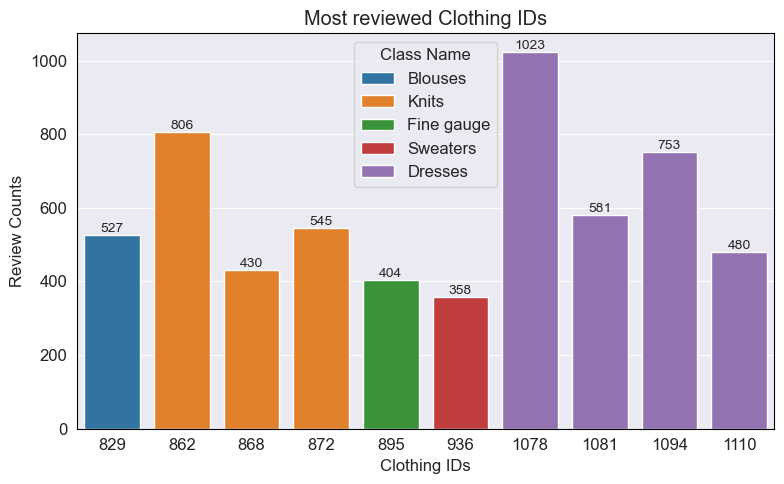

In [117]:
fig, ax = plt.subplots(figsize=(8,5))

#plot barplot
sns.barplot(data=sorted_df,
           x="Clothing ID", y= "Review Counts",
           hue="Class Name")

 # Add bar annotations in Millions format
for container in ax.containers:
    ax.bar_label(container,
                 labels=[f'{val:.0f}' for val in container.datavalues],
                 fontsize=10)

plt.title('Most reviewed Clothing IDs')
plt.xlabel("Clothing IDs")
plt.ylabel("Review Counts")


plt.tight_layout()
plt.show()

Among the top 10 reviewed items, `Clothing ID` **1078** is the most reviewed product.
* 4 out of 10 belong to "Dresses" Class
* 3 out of 10 belong to "Knits" Class
* 1 each out of 10 belong to "Blouses","Fine guage" & "Sweaters" Class respectively

### Q5. Analyse the most reviewed product?

Let us now undetsand the ratings of Clothing ID 1078 and try to get more detailed insights.

In [121]:
# function to create a data frame & plot rating 
def cloth_rating(clothing_id):
    df_1=main_df[main_df['Clothing ID']==clothing_id]
    df_2=df_1.groupby(['Rating'])['Clothing ID'].count().reset_index(name="Rating count")

    #plotting a bar graph
    fig,ax=plt.subplots()   
    sns.barplot(data=df_2,
               x="Rating", y= "Rating count")
    
     # Add bar annotations in Millions format
    for container in ax.containers:
        ax.bar_label(container,
                     labels=[f'{val:.0f}' for val in container.datavalues],
                     fontsize=10)
    
    plt.title('Ratings for Clothing ID: {}'.format(str(clothing_id)))
    plt.xlabel("Ratings")
    plt.ylabel("Review Counts")
    
    
    plt.tight_layout()
    plt.show()


In [122]:
# function to create a data frame & plot rating 
def cloth_recommend(clothing_id):
    df_1=main_df[main_df['Clothing ID']==clothing_id]
    df_test2=df_1.groupby(['Age Group','Recommended IND'])['Clothing ID'].count().reset_index(name="Rating count")
    #plotting a bar graph
    fig,ax=plt.subplots()   
    sns.barplot(data=df_test2,
               x="Recommended IND", y= "Rating count",
               estimator=sum, errorbar=None,
               hue="Age Group", palette=agecolors)
    
     # Add bar annotations in Millions format
    for container in ax.containers:
        ax.bar_label(container,
                     labels=[f'{val:.0f}' for val in container.datavalues],
                     fontsize=10)
    
    plt.title('Rating counts across the reviews')
    plt.xlabel("Recommended Indicator")
    plt.ylabel("Review Counts")
    
    
    plt.tight_layout()
    plt.show()

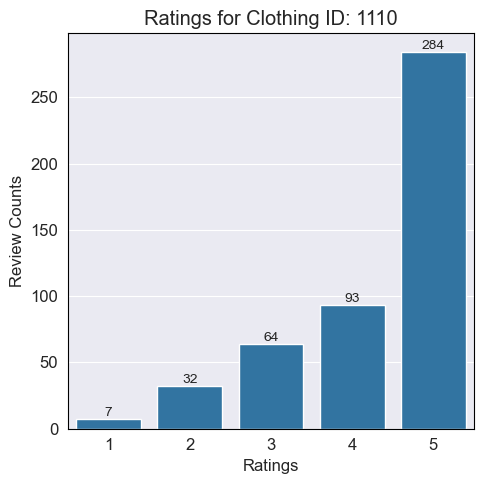

In [123]:
cloth_rating(1110)

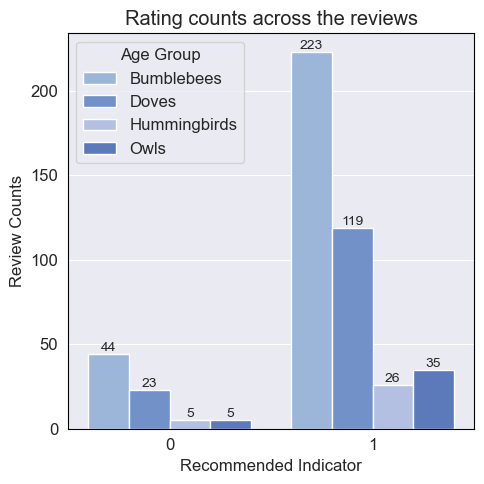

In [124]:
cloth_recommend(1110)

`Clothing ID` 1110 has 377 ratings of 4+ hence we can conclude that this particular product is doing well.

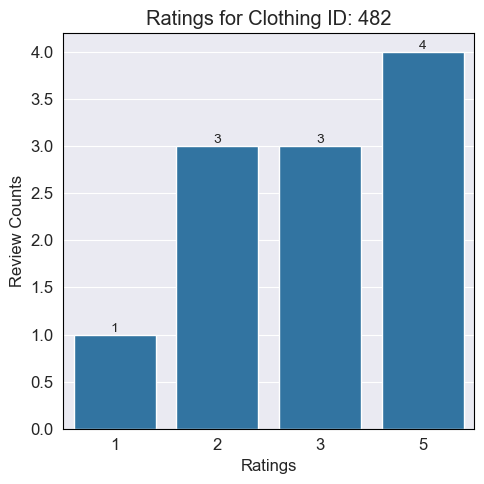

In [126]:
cloth_rating(482)

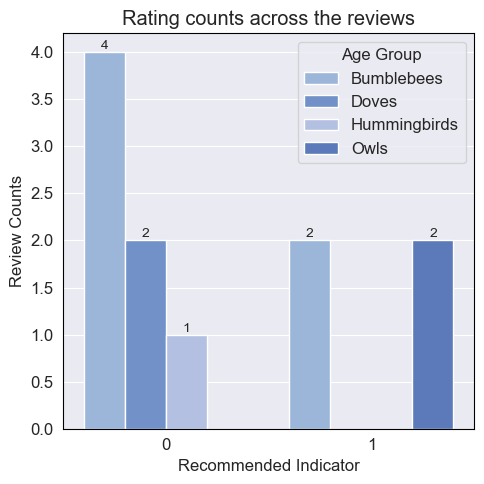

In [127]:
cloth_recommend(482)

`Clothing ID` 48 has only 4/11 ratings of 4+ hence we can conclude that there must be some issues with the products

In [129]:
for i in main_df[main_df['Clothing ID']==482].index:
    print(main_df.iloc[i]['Review Text'],'\n')

I normally wear a medium with these types of fabrics but this one was oddly proportioned on me. the skirt was also not very flattering to my hourglass figure, but it at least fit well. the top was baggy and gaped at the armpits as stated by others. i really wanted to like this dress but it made me look 20 pounds heavier even in the places it looked too big on me. i could have tried going with a small but the skirt would have then been too short. 

This top is very soft and well made. for my short and curvy figure, it is very unflattering. i considered altering it, but there is no way to do it. it gapes in the front and if you have a waist at all, it won't show because this top is boxy and full in that area. if you are tall and slim, it might be perfect, so give it a try. 

This floral tank looks so cute on. the layered cut is very flattering and i've received several compliments while wearing it. adorable 

Poor Product 

This is theoretically a great summer top addition to your wardro

In [130]:
df_test=main_df.groupby(['Rating', 'Age Group'])['Clothing ID'].count().reset_index(name="Rating count")
df_test

,Rating,Age Group,Rating count
0,1,Bumblebees,463
1,1,Doves,253
2,1,Hummingbirds,36
3,1,Owls,88
4,2,Bumblebees,931
5,2,Doves,441
6,2,Hummingbirds,59
7,2,Owls,132
8,3,Bumblebees,1721
9,3,Doves,762


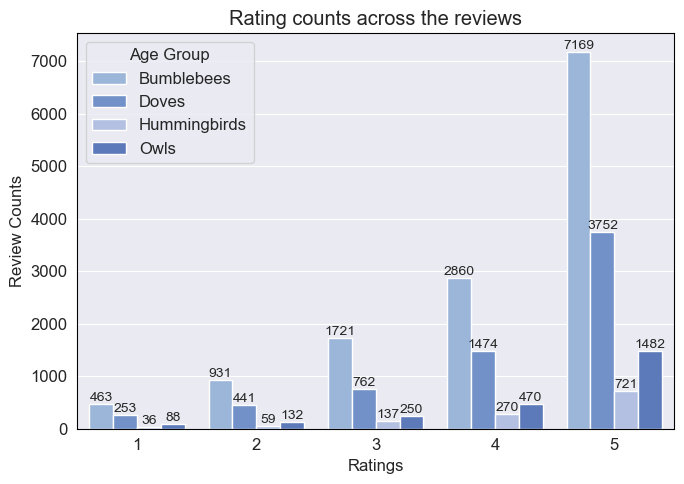

In [131]:
#plotting a bar graph
fig,ax=plt.subplots(figsize=(7,5))   
sns.barplot(data=df_test,
           x="Rating", y= "Rating count",
           estimator=sum, errorbar=None,
           hue="Age Group", palette=agecolors)

 # Add bar annotations in Millions format
for container in ax.containers:
    ax.bar_label(container,
                 labels=[f'{val:.0f}' for val in container.datavalues],
                 fontsize=10)

plt.title('Rating counts across the reviews')
plt.xlabel("Ratings")
plt.ylabel("Review Counts")


plt.tight_layout()
plt.show()

All visualizations indicate that participation and product recommendations from the 'Hummingbirds' age group (≤25 years) are notably low. This suggests a potential gap in engagement with younger customers, which could impact long-term brand loyalty and market growth.

**Recommendations to Improve Engagement:**
1. **Revamp Loyalty Programs**:
Introduce or tailor a review-based reward system offering discounts or exclusive perks for young customers who engage through product reviews or social shares.

2. **Enhance Social Media Strategy**:
Launch targeted campaigns on platforms popular among younger audiences (e.g., Instagram, TikTok) featuring influencers, behind-the-scenes content, or interactive challenges to drive brand interaction and visibility.

### Q6. Which reviews were most helpful?

In [137]:
most_helpful_rev_df=main_df.sort_values('Positive Feedback Count', ascending=False)
most_helpful_rev_df

,Sr No,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Age Group
7218,7218,1092,34,Beware if you're fuller in the chest,I loved the lace detailing all over this dress...,3,1,122,General,Dresses,Dresses,Bumblebees
1294,1294,1095,29,Excellent Product,I've been on the hunt for the perfect dress to...,5,1,117,General,Dresses,Dresses,Bumblebees
7765,7765,986,43,Quality does not merit cost,"I generally don't write bad reviews, but there...",1,0,108,General,Jackets,Jackets,Bumblebees
19094,19094,1121,35,A navy trench-yes!,I am a big fan of trench coats and i love that...,5,1,99,General,Jackets,Outerwear,Bumblebees
13210,13210,1078,23,"Super flattering, beautiful dress",This is my favorite dress i've bought in the p...,5,1,98,General,Dresses,Dresses,Hummingbirds
...,...,...,...,...,...,...,...,...,...,...,...,...
15191,15191,996,28,Spicy and comfortable,"This skirt was very figure flattering, and the...",5,1,0,General Petite,Bottoms,Skirts,Bumblebees
6709,6709,844,62,I'm wearing the hadley tunic for my birthday!!!!,Love this top! tried on a small in the store a...,5,1,0,General,Tops,Blouses,Owls
15193,15193,868,58,Love the boho look!,"Soft and pretty, but way too big and wide. lov...",4,1,0,General Petite,Tops,Knits,Doves
15194,15194,862,42,Excellent Product,Excellent Product,5,1,0,General,Tops,Knits,Bumblebees
